In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
df = pd.read_csv('/content/drive/MyDrive/mushroom (1)/agaricus-lepiota.data')
df.head()


,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [9]:
df.isnull().sum()

p      0
x      0
s      0
n      0
t      0
p.1    0
f      0
c      0
n.1    0
k      0
e      0
e.1    0
s.1    0
s.2    0
w      0
w.1    0
p.2    0
w.2    0
o      0
p.3    0
k.1    0
s.3    0
u      0
dtype: int64

In [10]:
df.describe()


,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [13]:
X=df.drop('p',axis=1)
y=df['p']
X.head()

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
2,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
3,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
4,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g


In [14]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder()
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [15]:
X.head()

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
1,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
2,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
3,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
4,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1


In [16]:
y

array([0, 0, 1, ..., 0, 1, 0])

poisonous=1
eatable=0

In [17]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,x_1,x_2,x_3,x_4,x_5,s_1,s_2,s_3,n_1,n_2,...,s.3_2,s.3_3,s.3_4,s.3_5,u_1,u_2,u_3,u_4,u_5,u_6
0,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [21]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

Logestic Regression:


In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

LogisticRegression()

In [34]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [32]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))


In [35]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9043

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2934
           1       0.96      0.84      0.89      2752

    accuracy                           0.90      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.91      0.90      0.90      5686


Confusion Matrix:
[[2828  106]
 [ 438 2314]]

Average Accuracy:	0.9047

Standard Deviation:	0.0154


In [36]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9081

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1274
           1       0.96      0.84      0.90      1163

    accuracy                           0.91      2437
   macro avg       0.92      0.91      0.91      2437
weighted avg       0.91      0.91      0.91      2437


Confusion Matrix:
[[1236   38]
 [ 186  977]]



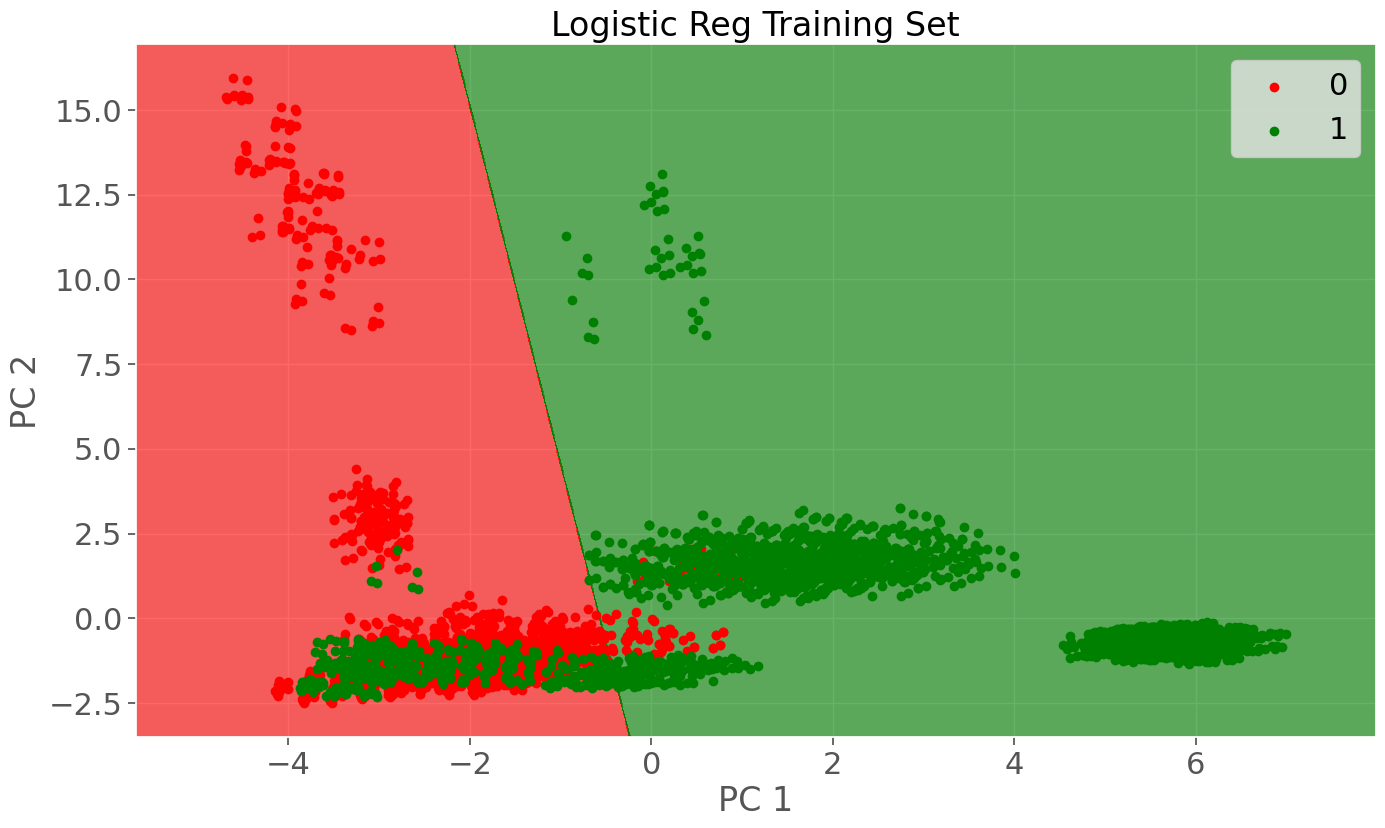

In [37]:
visualization_train('Logistic Reg')

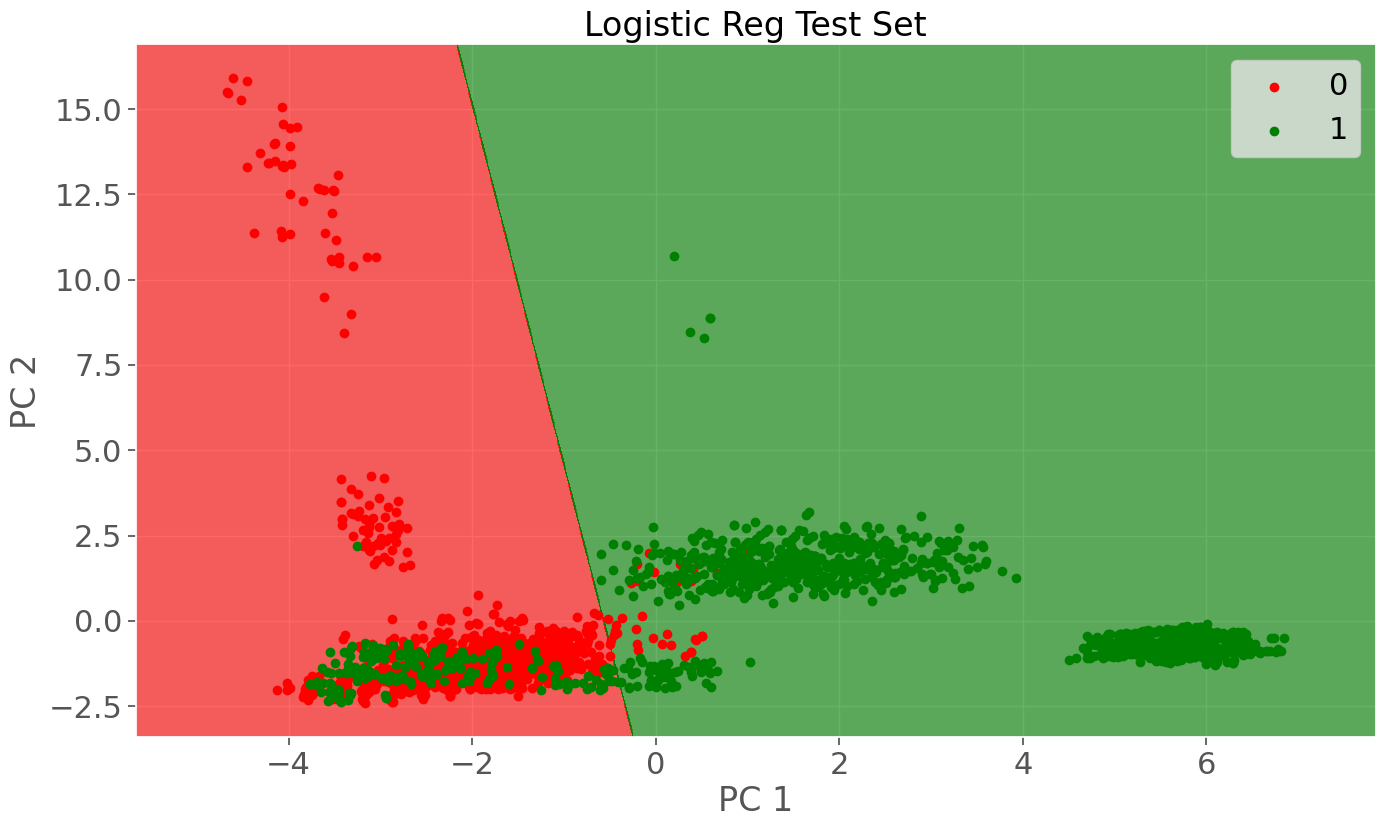

In [38]:
visualization_test('Logistic Reg')

SVM:


In [39]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42)

classifier.fit(X_train,y_train)

SVC(random_state=42)

In [40]:


print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9110

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2934
           1       0.97      0.84      0.90      2752

    accuracy                           0.91      5686
   macro avg       0.92      0.91      0.91      5686
weighted avg       0.92      0.91      0.91      5686


Confusion Matrix:
[[2857   77]
 [ 429 2323]]

Average Accuracy:	0.9112

Standard Deviation:	0.0143


In [41]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9151

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1274
           1       0.98      0.84      0.90      1163

    accuracy                           0.92      2437
   macro avg       0.92      0.91      0.91      2437
weighted avg       0.92      0.92      0.91      2437


Confusion Matrix:
[[1250   24]
 [ 183  980]]



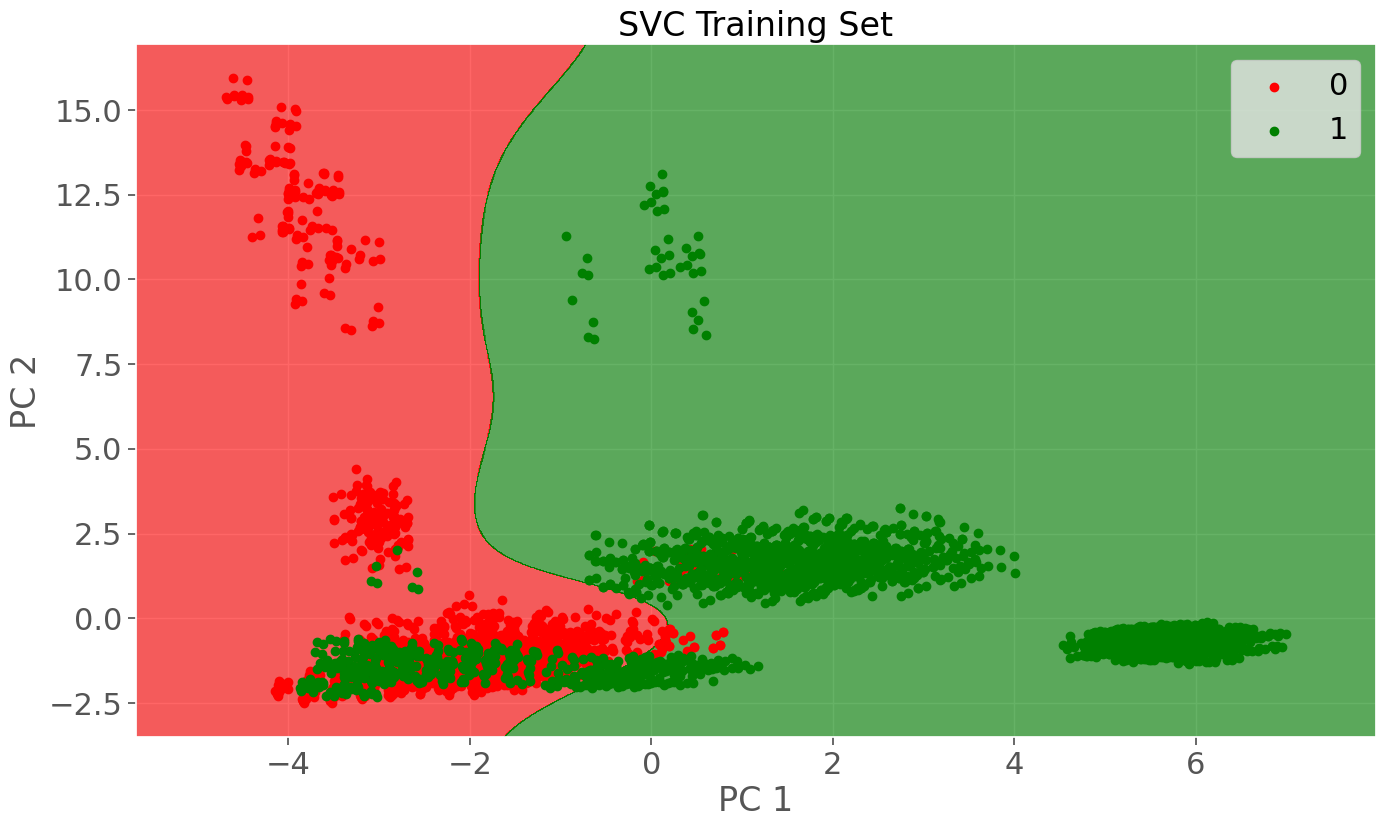

In [42]:
visualization_train('SVC')

KNN:


In [43]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9397

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2934
           1       0.96      0.91      0.94      2752

    accuracy                           0.94      5686
   macro avg       0.94      0.94      0.94      5686
weighted avg       0.94      0.94      0.94      5686


Confusion Matrix:
[[2836   98]
 [ 245 2507]]

Average Accuracy:	0.9281

Standard Deviation:	0.0120


In [45]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9356

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1274
           1       0.96      0.91      0.93      1163

    accuracy                           0.94      2437
   macro avg       0.94      0.93      0.94      2437
weighted avg       0.94      0.94      0.94      2437


Confusion Matrix:
[[1226   48]
 [ 109 1054]]



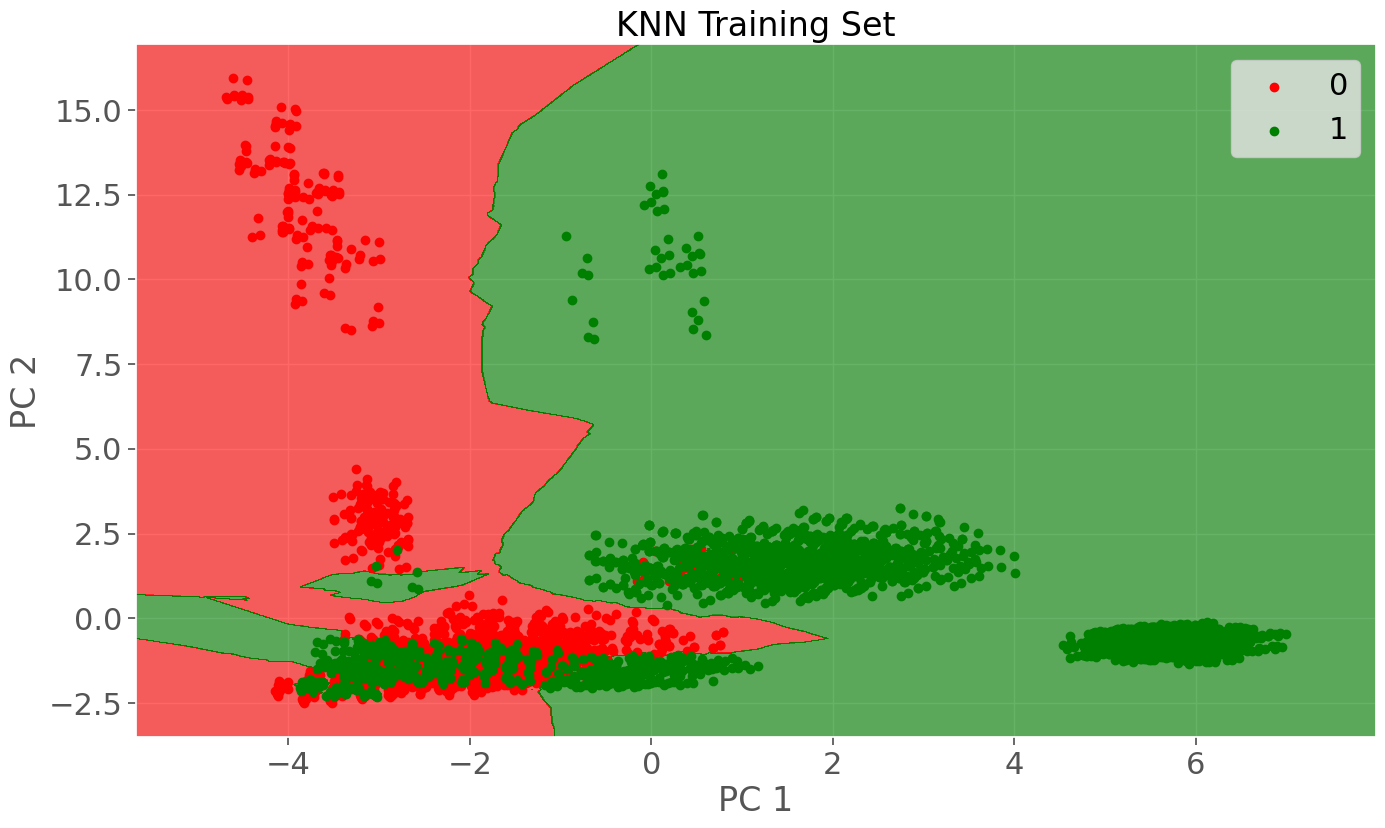

In [46]:


visualization_train('KNN')



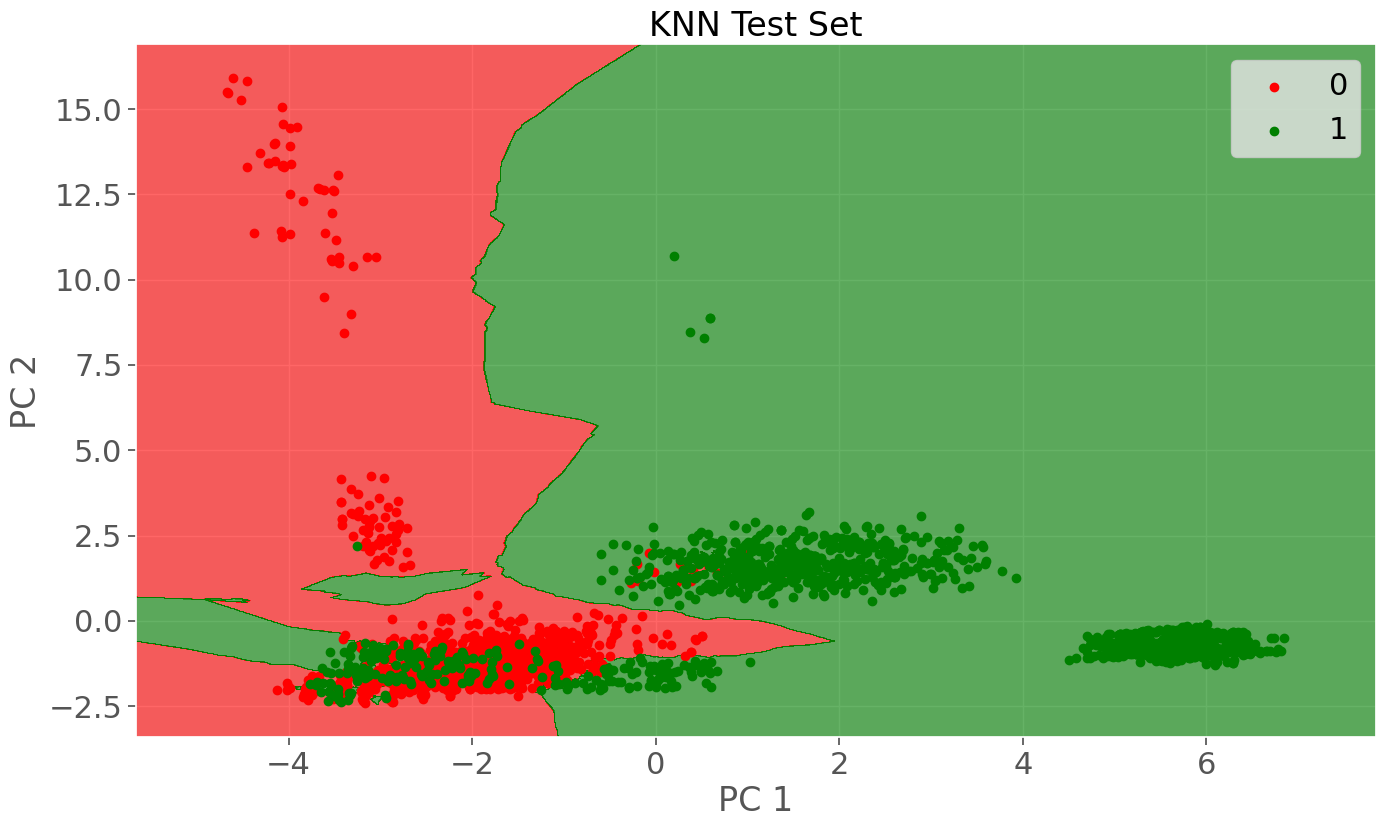

In [47]:
visualization_test('KNN')

Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)

GaussianNB()

In [50]:


print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.8945

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2934
           1       0.95      0.82      0.88      2752

    accuracy                           0.89      5686
   macro avg       0.90      0.89      0.89      5686
weighted avg       0.90      0.89      0.89      5686


Confusion Matrix:
[[2821  113]
 [ 487 2265]]

Average Accuracy:	0.8943

Standard Deviation:	0.0160


In [51]:


print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9040

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1274
           1       0.96      0.83      0.89      1163

    accuracy                           0.90      2437
   macro avg       0.91      0.90      0.90      2437
weighted avg       0.91      0.90      0.90      2437


Confusion Matrix:
[[1233   41]
 [ 193  970]]



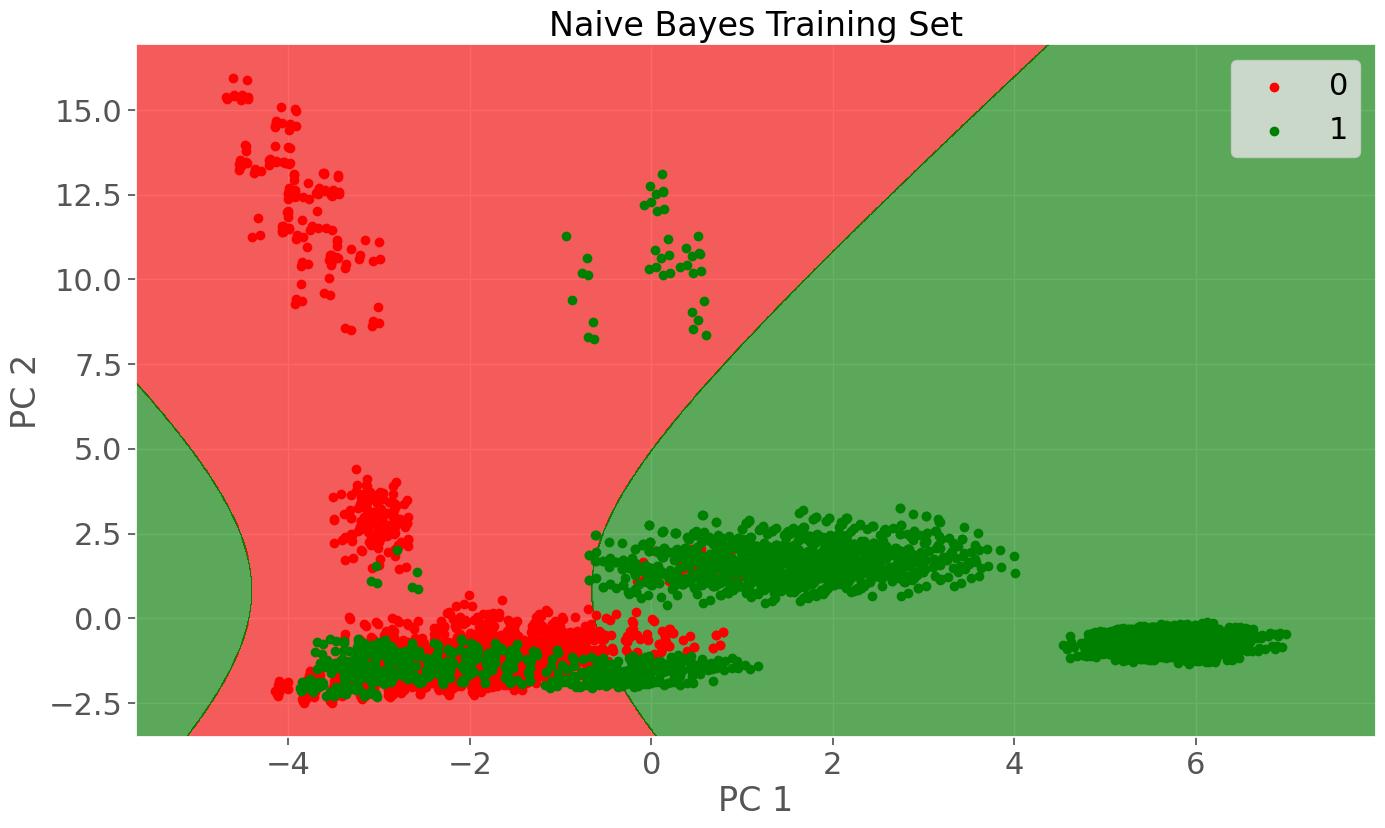

In [52]:
visualization_train('Naive Bayes')

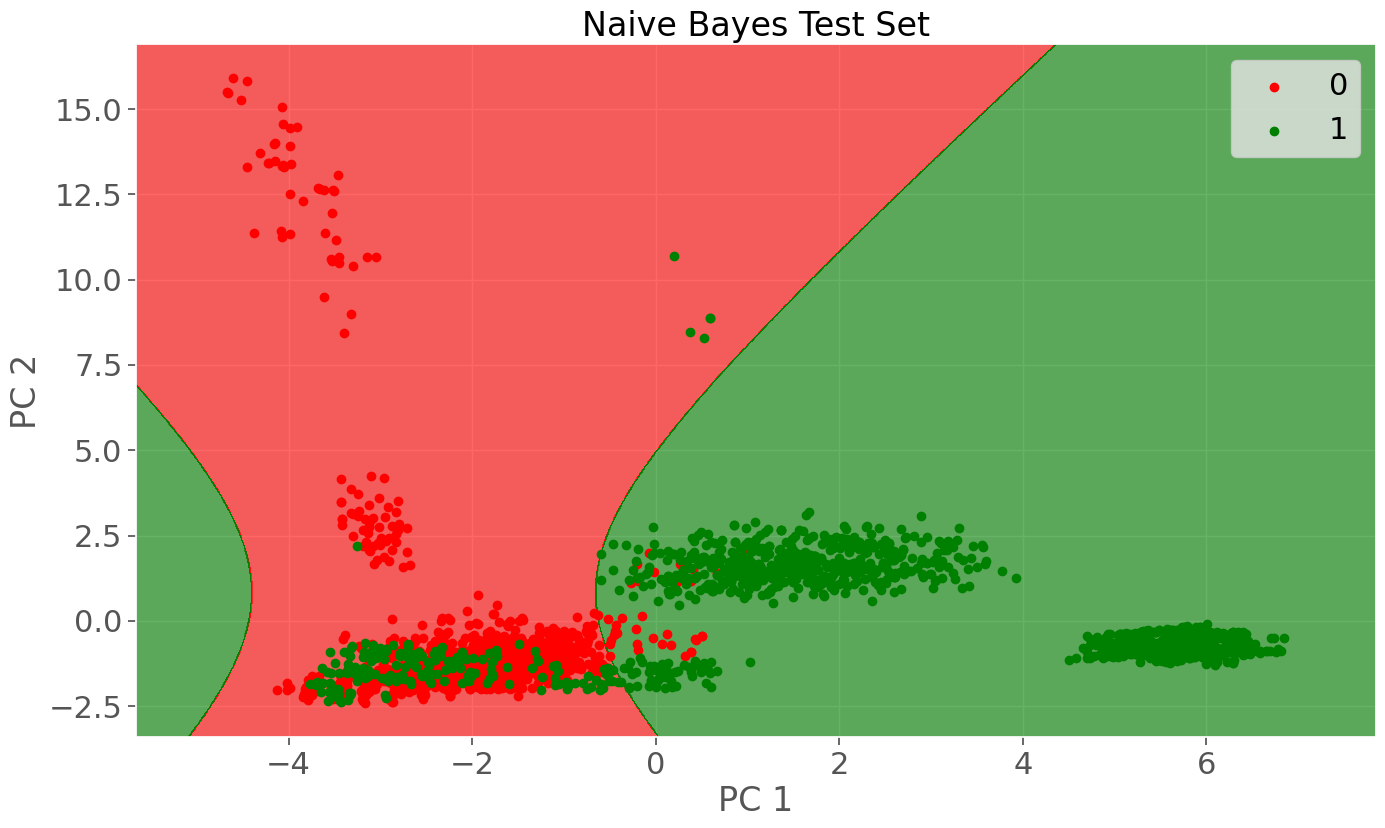

In [53]:
visualization_test('Naive Bayes')

In [55]:
pr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

NameError: name 'roc_curve' is not defined